# Police Killings Data Exploration 

We want to investigate police killings more and get to the facts. Luckily, there's a dataset that will help us do this. The team at FiveThirtyEight assembled a dataset using crowdsourced data and census data. It contains information on each police killing in the US, and can be found [here](https://github.com/fivethirtyeight/data/tree/master/police-killings).

## Data Exploration

In [39]:
import pandas as pd
police_killings = pd.read_csv('police_killings.csv', encoding = "ISO-8859-1")
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [40]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

Each of the 467 rows in the dataset contains information on a police killing of a civilian in the US in from January 2015 to June 2015. There are many interesting columns in the dataset, but here are some of the more relevant ones:

- name -- the name of the civilian.
- age -- the age of the civilian.
- gender -- the gender of the civilian.
- raceethnicity -- the race and ethnicity of the civilian.
- month, day, and year -- when the shooting occurred.
- streetaddress, city, state -- where the shooting occurred.
- lawenforcementagency -- the agency that was involved.
- cause -- the cause of death.
- armed -- whether or not the civilian was armed.
- pop -- population of the census area where the incident occurred.
- county_income -- median household income in the county.

## Shootings By Race
We can use the value_counts() method on a Series to count up how many times each unique value occurs in a column. If we run value_counts() on the raceethnicity column, we can discover how many people of each race were killed.

In [41]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

By looking at the number of instances where someone was killed and looking at their race, we can get a sense of who is getting shot. 

In [42]:
counts = police_killings['raceethnicity'].value_counts()
print(counts)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


Now, let's look at it on a graphic because it's easier to understand the difference.

([<matplotlib.axis.XTick at 0x7fdb68c3bcf8>,
 <a list of 6 Text xticklabel objects>)

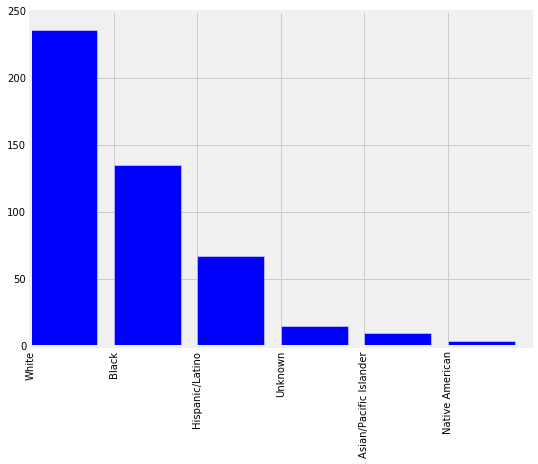

In [43]:
plt.figure(figsize=(8,6))
plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation='vertical')

We can arrange the data so we have a percentage for each race. 

In [44]:
percentage = counts / sum(counts)
print(percentage)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64


It looks like people identified as Black are far overrepresented in the shootings versus in the population of the US (28% vs 16%). You can see the breakdown of population by race here.
People identified as Hispanic appear to be killed about as often as random chance would account for (14% of the people killed as Hispanic, versus 17% of the overall population).
Whites are underrepresented among shooting victims vs their population percentage, as are Asians.

## Shootings By Regional Income
The p_income column is median personal income by census area. Looking at this will tell us if more of the shootings happened in less affluent areas or more affluent areas.

We can explore this relationship by making a histogram of the column. We'll need to do some data cleaning in order to construct the histogram, though, as not all the values in the p_income column are numeric. When an income couldn't be found for the census area, the value is a -. Because of this, the column has a string type instead of an integer type.

To fix this, and be able to construct a histogram, we'll need to remove all the - values from the column, then convert the column to an integer type.

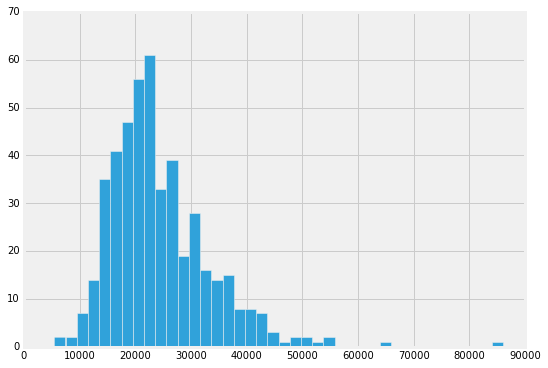

In [45]:
police_killings["p_income"][police_killings["p_income"] != '-'].astype(float).hist(bins =40, figsize=(8,6))

In [46]:
police_killings["p_income"][police_killings["p_income"] != '-'].astype(float).median()

22348.0

According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.

## Shootings By State
Since we have geographic data, we can look at breakdowns of shootings by region. We don't have a ton of data, so going for the largest possible regions (states) makes sense. If we looked at counties, we likely would get mostly 0 or 1 shootings per county, which wouldn't let us establish any patterns.

There is one caveat to be aware of when looking at population-level data. Finding that more people were shot in Texas than Georgia doesn't automatically mean that cops are more likely to shoot people in Texas. This is because Texas has a higher population than Georgia. To truly figure out which states tend to have police more likely to shoot people, we need to look at a population adjusted rate. We can compute this by dividing the number of people shot in each state by the state population.

To accomplish this, we'll need to leverage external data. We can find state-level data on population [here](https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html). Here are the relevant columns in the dataset:

- POPESTIMATE2015 -- the estimated 2015 population of the state.
- NAME -- the name of the state, as a string (such as Texas).
- STATE -- the numeric Census code of the state.

There's a problem here, though. In the police_killings Dataframe, the state column gives us a state name abbreviation, like CA. We can't use this to match the population with the right state in police_killings, because the population dataset only has complete state names. Instead, we'll use the state_fp column in police_killings to match. state_fp contains Census codes, which correspond to the STATE column in the population dataset.

We can use the merge() method on Dataframes to merge a Dataframe with another Dataframe that shares a common column.

In [47]:
state_pop = pd.read_csv('state_population.csv')

In [48]:
counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

In [49]:
states = states.merge(state_pop, on = 'STATE')

In [50]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]

states.sort_values(by="rate")

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


In [51]:
police_killings['state'].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
LA    11
NJ    11
IL    11
OH    10
NC    10
MO    10
MD    10
VA     9
MI     9
SC     9
AL     8
IN     8
OR     8
KY     7
PA     7
MN     6
MS     6
KS     6
TN     6
NE     6
UT     5
NM     5
WI     5
MA     5
AR     4
HI     4
ID     4
NV     3
DE     2
IA     2
MT     2
WV     2
AK     2
DC     1
WY     1
NH     1
ME     1
CT     1
Name: state, dtype: int64

States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest.

## State By State Differences
Why do some states have a much higher rate of police killings than others? Is it due to random chance, or is there an underlying factor that could explain it? It will be good to dive more into the data to find any significant differences.

We'll first need to split police_killings into two parts. One part will have the 10 states with the lowest shooting rate, and the other will have the 10 states with the highest shooting rate. We can use the isin() method to perform this split. We can first make a list of 10 abbreviations corresponding to the lowest shooting rate states. Then, use isin() to only select rows from police_killings where the state column is in the list.

We'll then be able to look at a few columns that could reveal interesting differences:

- pop -- population of the census area where the incident occurred.
- county_income -- median household income in the county.
- share_white -- the percentage (out of 100) of whites in the census area.
- share_black -- the percentage (out of 100) of blacks in the census area.
- share_hispanic -- the percentage (out of 100) of hispanics in the census area.

We can use the describe() method on Dataframes to compute summary statistics for each column in each Dataframe. This will reveal differences between the states with high and low shooting rates.

In [52]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

/home/francois/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/francois/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/francois/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [53]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [54]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [55]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the shootings occur is higher.
States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.

## Ideas for Extra Exploration
Here are some potential next steps:

- Explore some of the columns we didn't look at.
- Integrate more outside data sources. Here are some ideas:
    - Data.gov - [http://www.data.gov/](http://www.data.gov/)
    - Socrata - [https://opendata.socrata.com/](https://opendata.socrata.com/)
    - Github - https://github.com/caesar0301/awesome-public-datasets
    - Census Data - https://www.census.gov
- Map out state-level data in a choropleth map with matplotlib. Here's an example.
- Look more into the cause column, and see if there are any patterns.
- Is there any other data on police brutality that could augment this analysis?
- Look more broadly at crime rates where the shootings occured, and see if there are any correlations.
